# Plot the information from the variables and make comparisons between data sets (box plots or histograms), considering a quantitative variable and some data grouping criteria (qualitative variable) or a criterion for forming intervals (quantitative variable). If necessary, include the information in a frequency table.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from copy import deepcopy

In [2]:
PATH = "../../../DataCleaning/"

In [3]:
df = pd.read_csv(PATH + "Atmospheric Data With No Missing Values.csv")

In [4]:
df.head()

,O3,O3_flag,NO2,NO2_flag,NO,NO_flag,CO,CO_flag,PM10,PM10_flag,...,WDir_Avg,WDir_SD,Rain_Tot,Press_Avg,Rad_Avg,Year,Month,Day,Hour,Minute
0,55.48,OK,0.72,OK,0.2,BDL,0.25,OK,25.47,OK,...,173.6,14.26,0.0,805.409,NaN,2023,5,1,0,0
1,55.49,OK,0.81,OK,0.2,BDL,0.26,OK,25.74,OK,...,171.0,10.53,0.0,805.524,NaN,2023,5,1,0,1
2,55.40,OK,0.93,OK,0.2,BDL,0.27,OK,26.60,OK,...,178.6,15.72,0.0,805.436,NaN,2023,5,1,0,2
3,55.20,OK,0.87,OK,0.2,BDL,0.28,OK,27.59,OK,...,186.1,17.43,0.0,805.450,NaN,2023,5,1,0,3
4,55.41,OK,0.98,OK,0.2,BDL,0.28,OK,27.83,OK,...,211.5,21.67,0.0,805.504,NaN,2023,5,1,0,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443508 entries, 0 to 443507
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   O3          443508 non-null  float64
 1   O3_flag     443508 non-null  object 
 2   NO2         443508 non-null  float64
 3   NO2_flag    443508 non-null  object 
 4   NO          443508 non-null  float64
 5   NO_flag     443508 non-null  object 
 6   CO          443508 non-null  float64
 7   CO_flag     443508 non-null  object 
 8   PM10        443508 non-null  float64
 9   PM10_flag   443508 non-null  object 
 10  PM2.5       443508 non-null  float64
 11  PM2.5_flag  443508 non-null  object 
 12  Temp_Avg    443508 non-null  float64
 13  RH_Avg      443508 non-null  float64
 14  WSpeed_Avg  443508 non-null  float64
 15  WSpeed_Max  443508 non-null  float64
 16  WDir_Avg    443508 non-null  float64
 17  WDir_SD     443508 non-null  float64
 18  Rain_Tot    443508 non-null  float64
 19  Pr

## Sensors performances according to their flags.

In [8]:
df_subset = df[["O3_flag", "NO2_flag", "NO_flag", "CO_flag", "PM10_flag", "PM2.5_flag"]]
df_subset.head()

,O3_flag,NO2_flag,NO_flag,CO_flag,PM10_flag,PM2.5_flag
0,OK,OK,BDL,OK,OK,OK
1,OK,OK,BDL,OK,OK,OK
2,OK,OK,BDL,OK,OK,OK
3,OK,OK,BDL,OK,OK,OK
4,OK,OK,BDL,OK,OK,OK


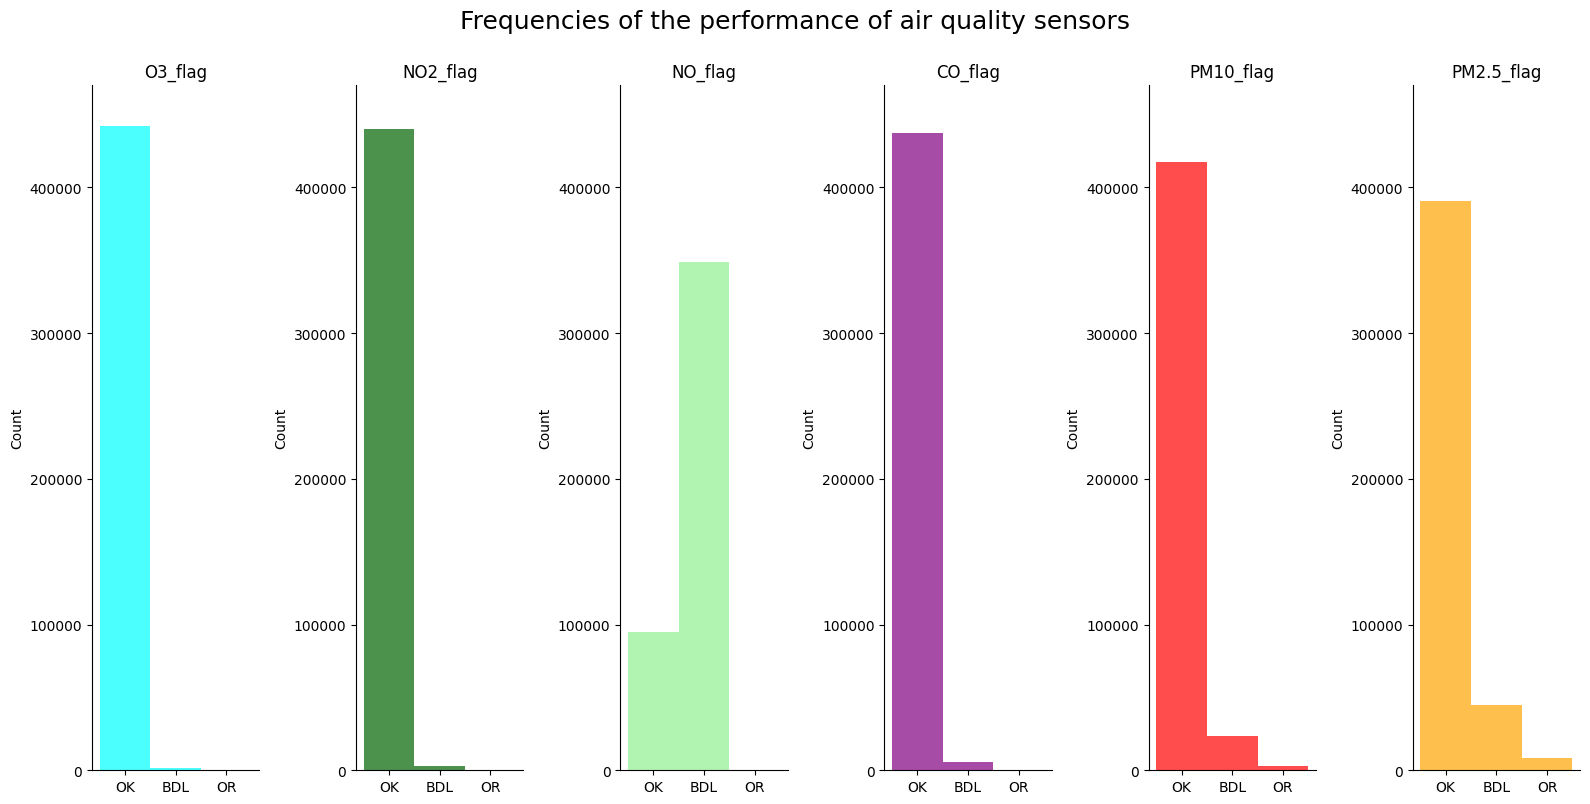

In [38]:
colors = ["cyan", "darkgreen", "lightgreen", "purple", "red", "orange"]
fig, axes = plt.subplots(nrows=1, ncols=len(df_subset.columns), figsize=(16,8))
for i, c in enumerate(df_subset.columns):
    hist = sns.histplot(pd.Categorical(df_subset[c], categories=["OK", "BDL", "OR"], ordered=True), ax=axes[i], alpha=0.7, binwidth=3, color=colors[i], edgecolor=None)
    axes[i].set_title(c)
    hist.spines['top'].set_visible(False)
    hist.spines['right'].set_visible(False)
    hist.set_ylim(0, 470000)
plt.suptitle("Frequencies of the performance of air quality sensors", fontsize=18, y=1)
plt.tight_layout()
plt.show()

## Air quality variables boxplots (checking their distribution)

In [50]:
df_subset = deepcopy(df[["O3", "NO2", "NO", "CO", "PM10", "PM2.5"]])
df_subset.head()

,O3,NO2,NO,CO,PM10,PM2.5
0,55.48,0.72,0.2,0.25,25.47,16.39
1,55.49,0.81,0.2,0.26,25.74,16.47
2,55.40,0.93,0.2,0.27,26.60,17.06
3,55.20,0.87,0.2,0.28,27.59,18.19
4,55.41,0.98,0.2,0.28,27.83,18.50


Same units for CO

In [51]:
df_subset["CO"] = df_subset["CO"].apply(lambda x: x*1000)

In [52]:
df_subset.head()

,O3,NO2,NO,CO,PM10,PM2.5
0,55.48,0.72,0.2,250.0,25.47,16.39
1,55.49,0.81,0.2,260.0,25.74,16.47
2,55.40,0.93,0.2,270.0,26.60,17.06
3,55.20,0.87,0.2,280.0,27.59,18.19
4,55.41,0.98,0.2,280.0,27.83,18.50


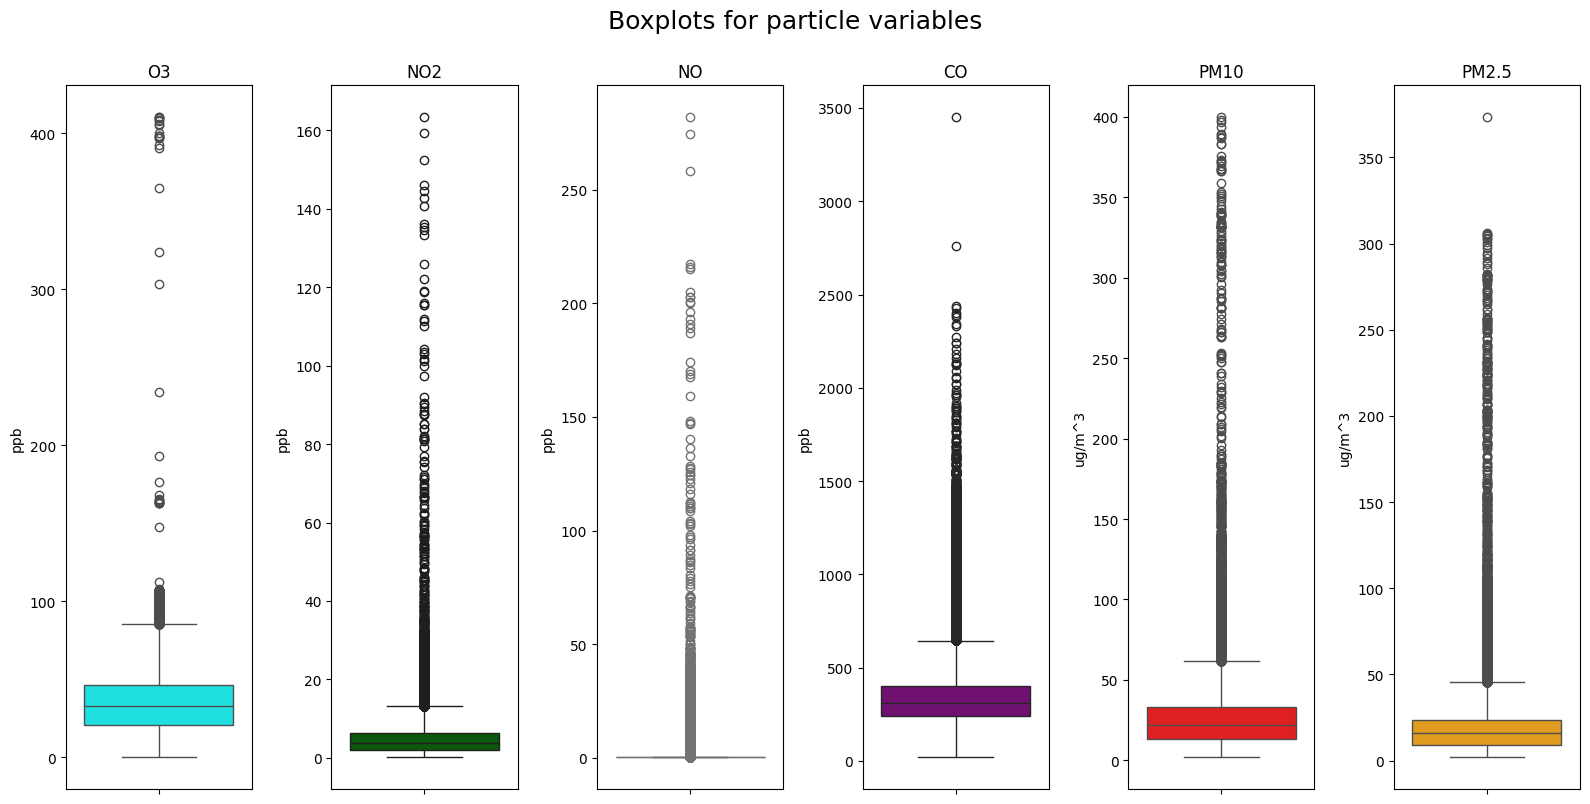

In [59]:
colors = ["cyan", "darkgreen", "lightgreen", "purple", "red", "orange"]
fig, axes = plt.subplots(nrows=1, ncols=len(df_subset.columns), figsize=(16,8))
for i, c in enumerate(df_subset.columns):
    box = sns.boxplot(df_subset[c], ax=axes[i], color=colors[i])
    axes[i].set_title(c)
    if c == "PM10" or c == "PM2.5": units = "ug/m^3"
    else: units = "ppb"
    axes[i].set_ylabel(units)
plt.suptitle("Boxplots for particle variables", fontsize=18, y=1)
plt.tight_layout()
plt.show()

## Air quality variables distribution (in another way than boxplots)

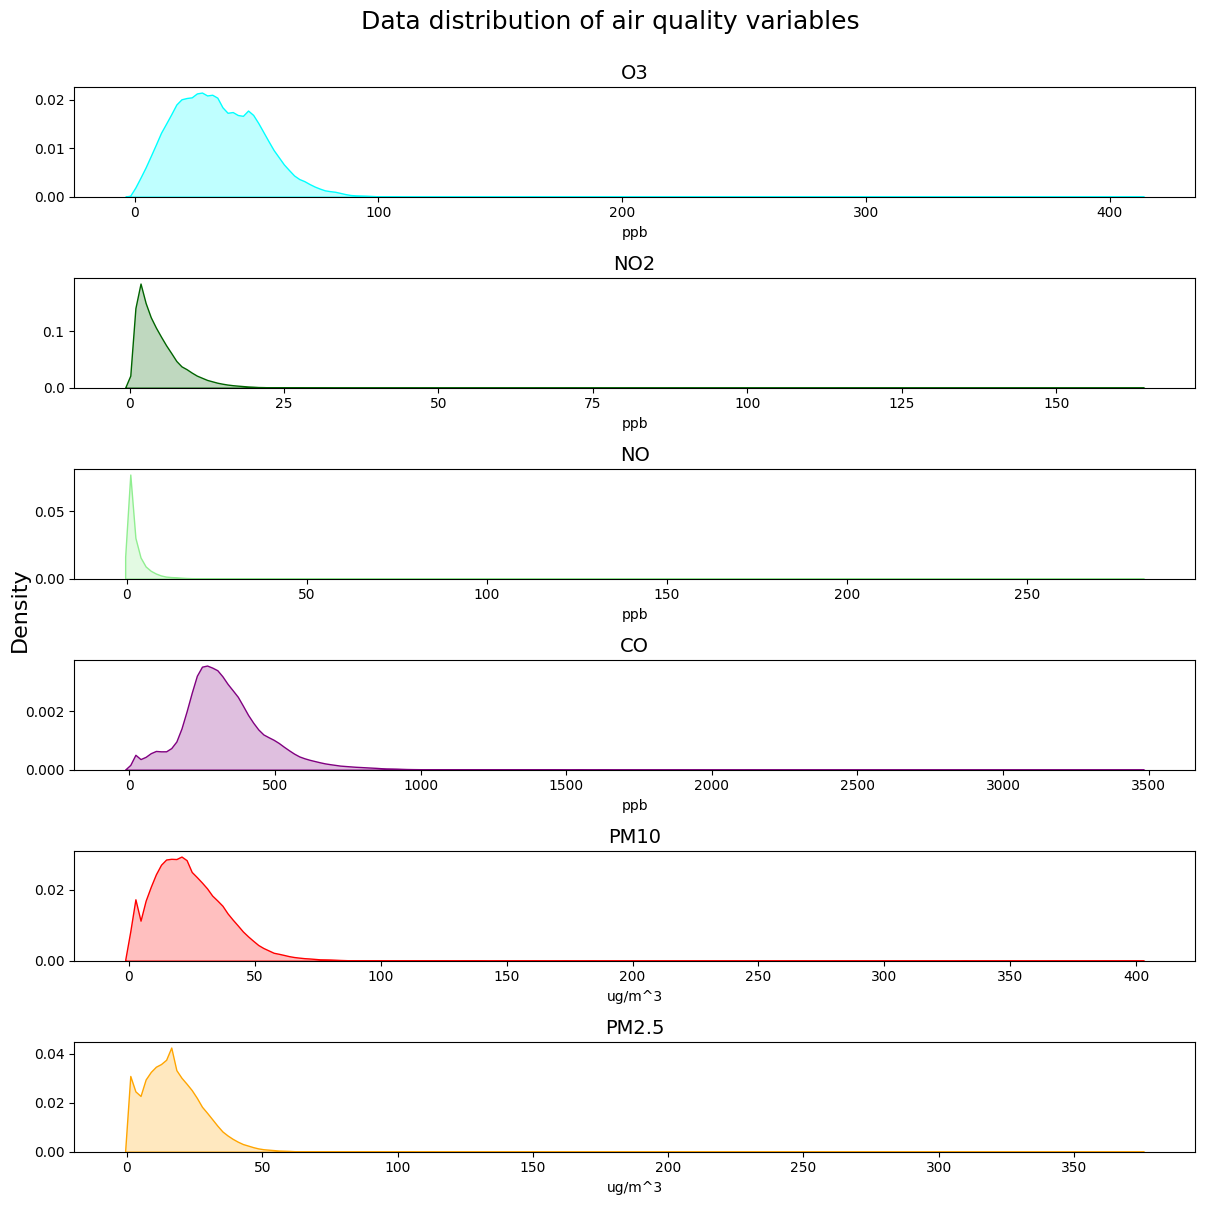

In [74]:
colors = ["cyan", "darkgreen", "lightgreen", "purple", "red", "orange"]
fig, axes = plt.subplots(nrows=len(df_subset.columns), ncols=1, figsize=(12,12))
for i, c in enumerate(df_subset.columns):
    density = sns.kdeplot(df_subset[c], ax=axes[i], color=colors[i], fill=True)
    axes[i].set_title(c, fontsize=14)
    if c == "PM10" or c == "PM2.5": units = "ug/m^3"
    else: units = "ppb"
    axes[i].set_xlabel(units)
    axes[i].set_ylabel(None)
fig.text(0, 0.5, "Density", va='center', rotation='vertical', fontsize=16) 
plt.suptitle("Data distribution of air quality variables", fontsize=18, y=1)
plt.tight_layout()
plt.show()

## Meteorology variables

In [112]:
df_meteorology = deepcopy(df[["Temp_Avg", "RH_Avg", "WSpeed_Avg", "WDir_Avg", "Rain_Tot", "Press_Avg", "Rad_Avg"]])
df_meteorology.head()

,Temp_Avg,RH_Avg,WSpeed_Avg,WDir_Avg,Rain_Tot,Press_Avg,Rad_Avg
0,19.15,31.64,3.521,173.6,0.0,805.409,NaN
1,19.11,31.66,3.644,171.0,0.0,805.524,NaN
2,19.09,31.70,4.139,178.6,0.0,805.436,NaN
3,19.10,31.76,3.692,186.1,0.0,805.450,NaN
4,19.10,31.76,2.198,211.5,0.0,805.504,NaN


Discretize the wind direction variable

In [113]:
df_meteorology["WDir_Avg"] = df_meteorology["WDir_Avg"].apply(lambda x: round(x))
df_meteorology["WDir_Avg"] = df_meteorology["WDir_Avg"].apply(lambda x: x if x != 360 else 0)
df_meteorology["WDir_Avg"].describe()

count    443508.000000
mean        144.648106
std         107.958139
min           0.000000
25%          42.000000
50%         148.000000
75%         228.000000
max         359.000000
Name: WDir_Avg, dtype: float64

## Wind direction frequency

Taking in consideration the zero

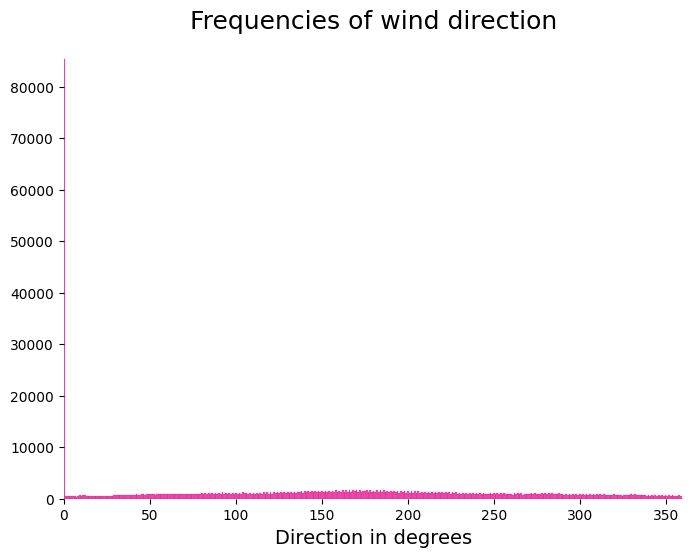

In [114]:
plt.figure(figsize=(8,6))
hist = sns.histplot(df_meteorology["WDir_Avg"], bins=360, color="deeppink", edgecolor="purple")
hist.set_xlim(0,360)
hist.set_xlabel("Direction in degrees", fontsize=14)
hist.set_ylabel(None)
hist.spines['top'].set_visible(False)
hist.spines['right'].set_visible(False)
hist.spines['left'].set_visible(False)
hist.spines['bottom'].set_visible(False)
plt.title("Frequencies of wind direction", fontsize=18)
plt.show()

Without take in consideration the zero

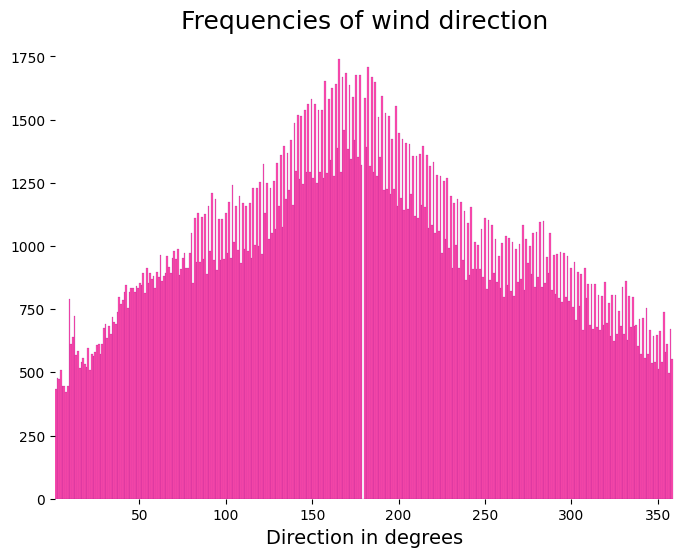

In [117]:
plt.figure(figsize=(8,6))
hist = sns.histplot(df_meteorology[df_meteorology["WDir_Avg"] != 0]["WDir_Avg"], bins=360, color="deeppink", edgecolor="purple")
hist.set_xlim(1,360)
hist.set_xlabel("Direction in degrees", fontsize=14)
hist.set_ylabel(None)
hist.spines['top'].set_visible(False)
hist.spines['right'].set_visible(False)
hist.spines['left'].set_visible(False)
hist.spines['bottom'].set_visible(False)
plt.title("Frequencies of wind direction", fontsize=18)
plt.show()

## Frequencies of relative humidity

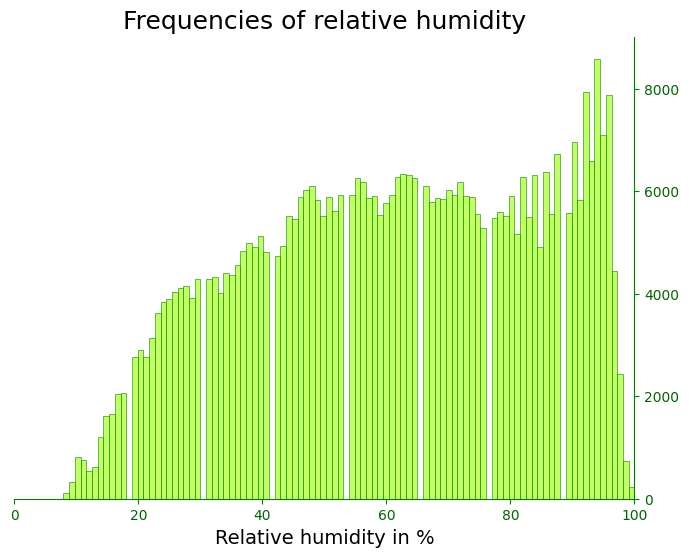

In [137]:
plt.figure(figsize=(8,6))
hist = sns.histplot(df_meteorology["RH_Avg"].apply(lambda x: round(x)), bins=101, color="greenyellow", edgecolor="green")
hist.set_xlim(0,100)
hist.set_xlabel("Relative humidity in %", fontsize=14)
hist.set_ylabel(None)
hist.spines['top'].set_visible(False)
hist.spines['left'].set_visible(False)
hist.spines['bottom'].set_edgecolor("green")
hist.spines['right'].set_edgecolor("green")
hist.tick_params(color='green', labelcolor='darkgreen', labelright=True, labelleft=False, left=False, right=True)
plt.title("Frequencies of relative humidity", fontsize=18)
plt.show()

## Boxplot of meteorology variables

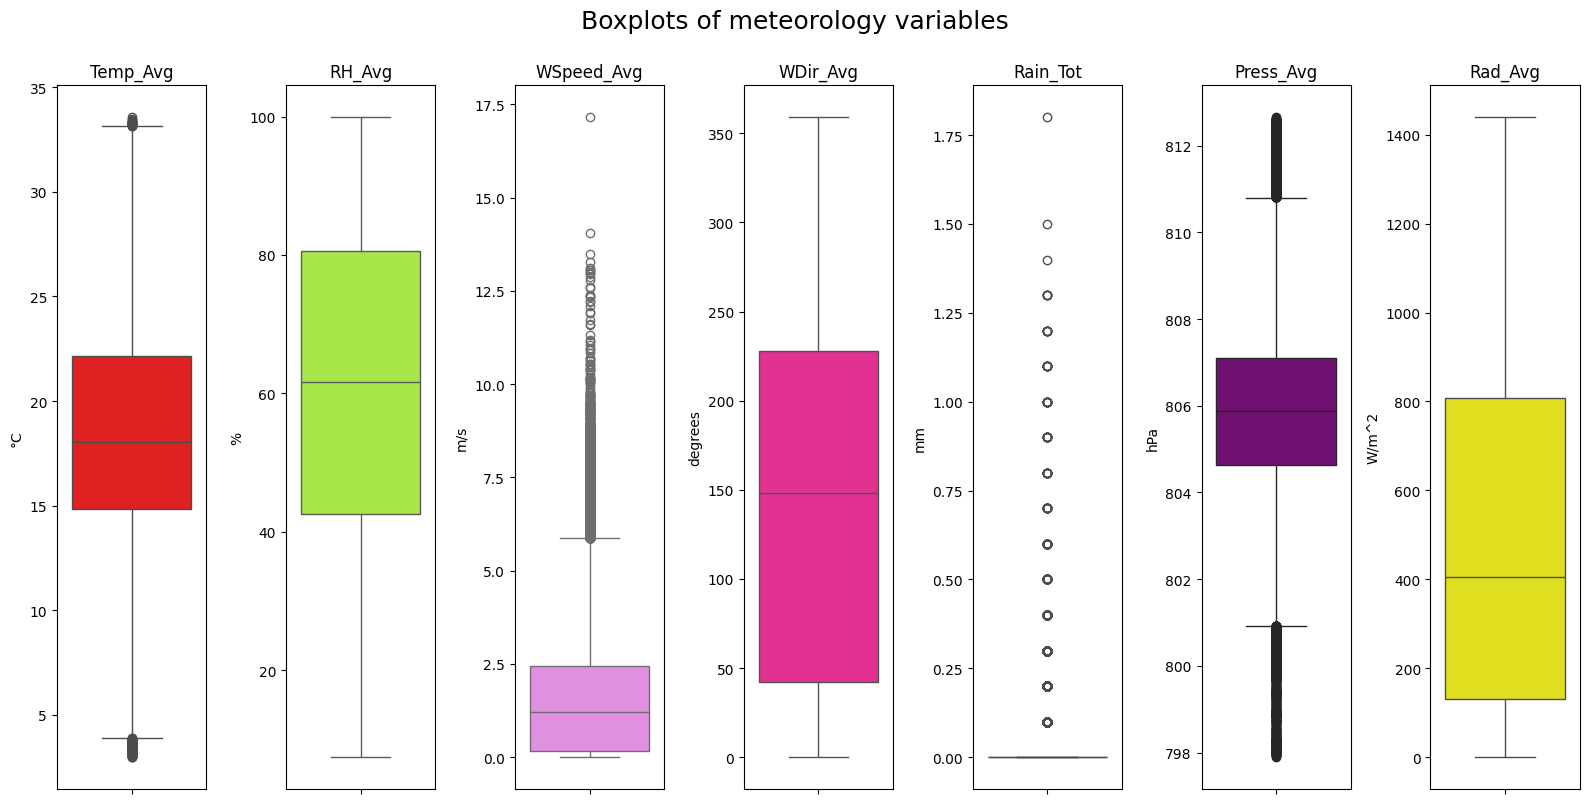

In [140]:
colors = ["red", "greenyellow", "violet", "deeppink", "cyan", "purple", "yellow"]
units = ["°C", "%", "m/s", "degrees", "mm", "hPa", "W/m^2"]
fig, axes = plt.subplots(nrows=1, ncols=len(df_meteorology.columns), figsize=(16,8))
for i, c in enumerate(df_meteorology.columns):
    box = sns.boxplot(df_meteorology[c], ax=axes[i], color=colors[i])
    axes[i].set_title(c)
    box.set_ylabel(units[i])
plt.suptitle("Boxplots of meteorology variables", fontsize=18, y=1)
plt.tight_layout()
plt.show()

## Data distribution of meteorology variables 

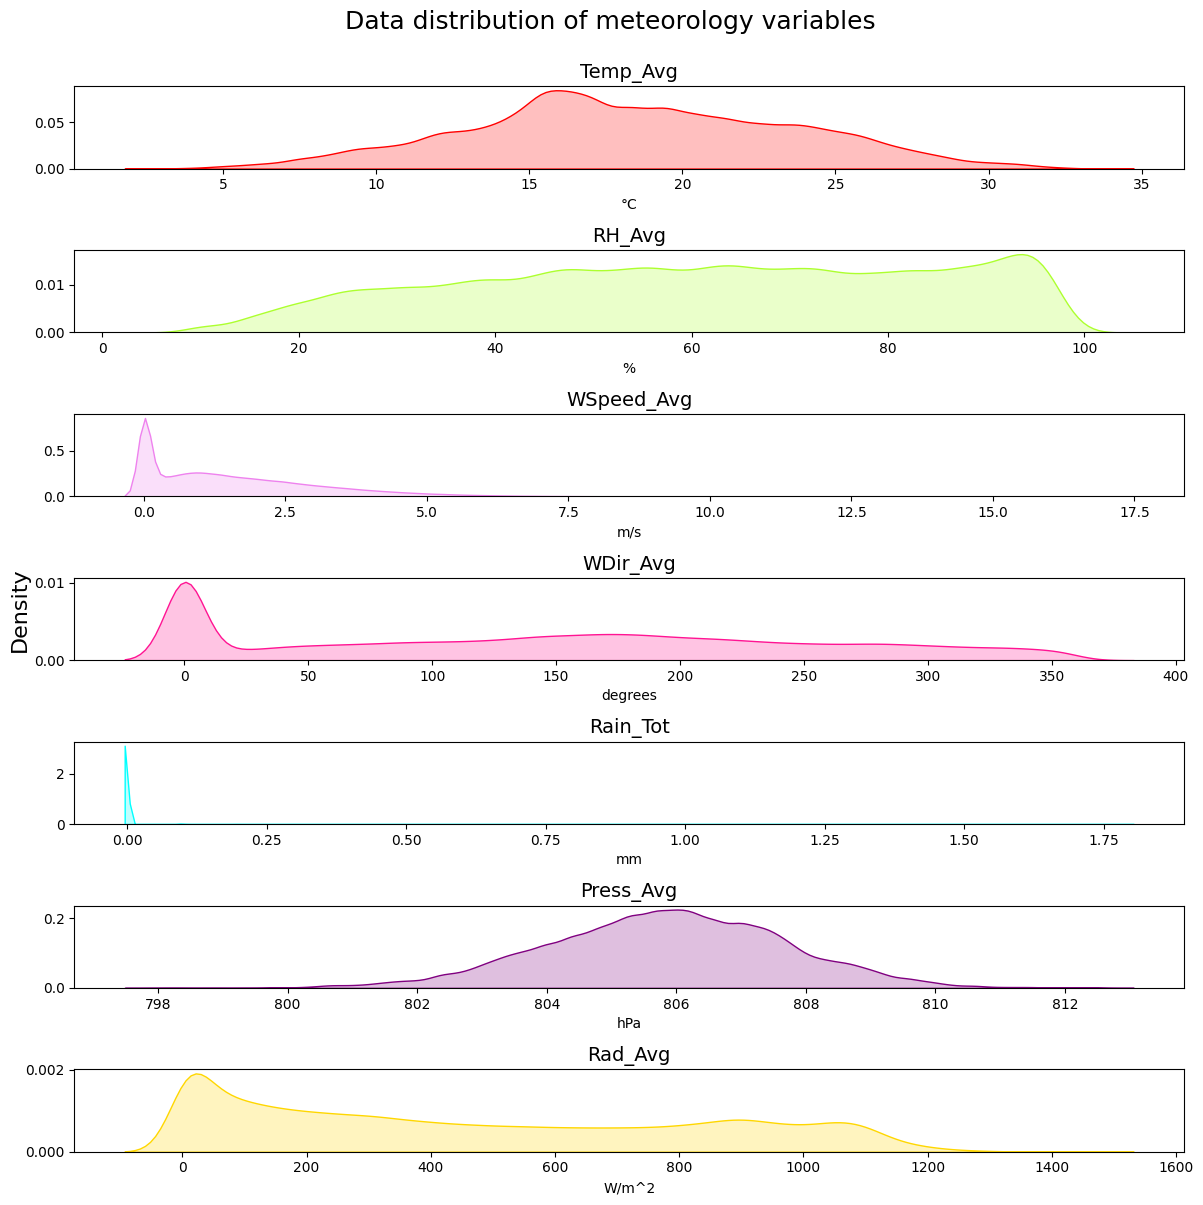

In [143]:
colors = ["red", "greenyellow", "violet", "deeppink", "cyan", "purple", "gold"]
units = ["°C", "%", "m/s", "degrees", "mm", "hPa", "W/m^2"]
fig, axes = plt.subplots(nrows=len(df_meteorology.columns), ncols=1, figsize=(12,12))
for i, c in enumerate(df_meteorology.columns):
    density = sns.kdeplot(df_meteorology[c], ax=axes[i], color=colors[i], fill=True)
    axes[i].set_title(c, fontsize=14)
    axes[i].set_xlabel(units[i])
    axes[i].set_ylabel(None)
fig.text(0, 0.5, "Density", va='center', rotation='vertical', fontsize=16) 
plt.suptitle("Data distribution of meteorology variables", fontsize=18, y=1)
plt.tight_layout()
plt.show()

## Air quality variables grouped by month

In [150]:
df_O3 = deepcopy(df[["O3", "Month"]])
df_NO2 = deepcopy(df[["NO2", "Month"]])
df_NO = deepcopy(df[["NO", "Month"]])
df_CO = deepcopy(df[["CO", "Month"]])
df_PM10 = deepcopy(df[["PM10", "Month"]])
df_PM2_5 = deepcopy(df[["PM2.5", "Month"]])

In [151]:
df_CO["CO"] = df_CO["CO"].apply(lambda x: x*1000)

In [152]:
df_O3 = df_O3.groupby(by="Month").mean()
df_NO = df_NO.groupby(by="Month").mean()
df_NO2 = df_NO2.groupby(by="Month").mean()
df_CO = df_CO.groupby(by="Month").mean()
df_PM10 = df_PM10.groupby(by="Month").mean()
df_PM2_5 = df_PM2_5.groupby(by="Month").mean()

In [154]:
df_month_molecules = pd.concat([df_O3, df_NO2, df_NO, df_CO], axis=1)
df_month_molecules

,O3,NO2,NO,CO
Month,,,,
1,25.455407,4.519217,0.838844,327.624204
2,39.680725,5.841978,1.042345,485.083880
3,38.856105,3.725834,0.505712,318.869258
4,42.939291,3.229577,0.487808,375.459776
5,45.826892,4.764082,0.515664,358.701083
6,43.272398,3.295414,0.337662,292.902469
7,36.657348,4.658704,0.588112,151.582275
8,30.756766,4.304674,0.759204,301.757430
9,32.821466,4.723110,0.925524,305.396069


In [155]:
df_month_particles = pd.concat([df_PM10, df_PM2_5], axis=1)
df_month_particles

,PM10,PM2.5
Month,,
1,18.164843,12.078700
2,25.430018,14.688975
3,29.304541,16.826174
4,38.835006,26.481485
5,40.952716,31.171510
6,34.493303,24.219175
7,17.011766,13.865244
8,16.982472,12.881904
9,20.805498,16.601775


## Evolution of air molecules concentration during the year

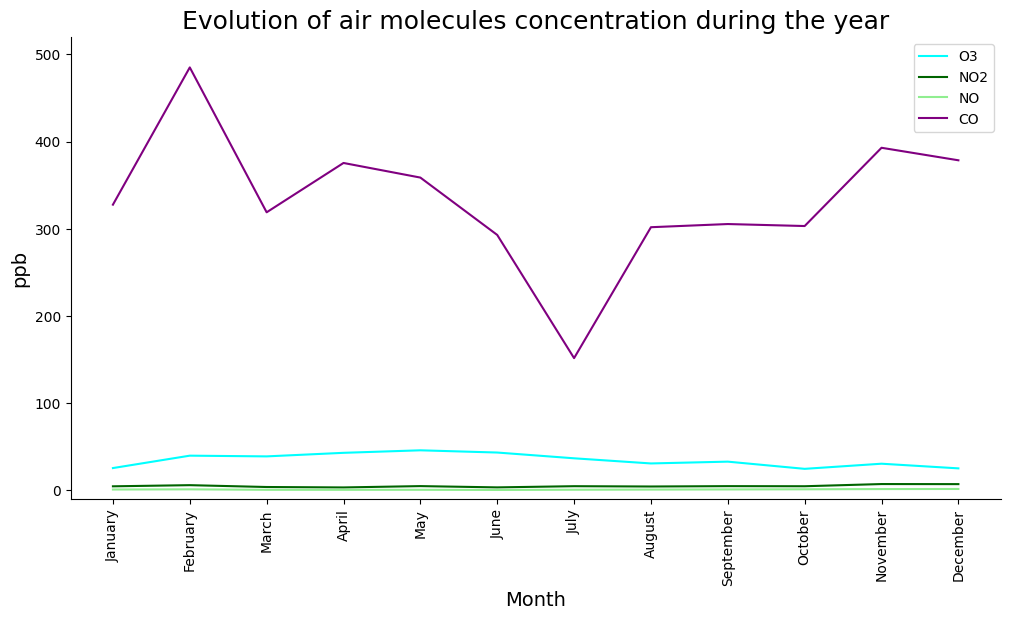

In [192]:
molecules = ["O3", "NO2", "NO", "CO"]
colors = ["cyan", "darkgreen", "lightgreen", "purple"]
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.figure(figsize=(12,6))
plt.title("Evolution of air molecules concentration during the year", fontsize=18)
for i, c in enumerate(molecules):
    lines = sns.lineplot(x=months, y=df_month_molecules[c], color=colors[i], label=c)
    lines.legend(loc='best')
lines.spines["top"].set_visible(False)
lines.spines["right"].set_visible(False)
plt.ylim(-10, 520)
plt.ylabel("ppb", fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.xticks(rotation=90)
plt.show()

Let's separate the CO in another graph for better visualization

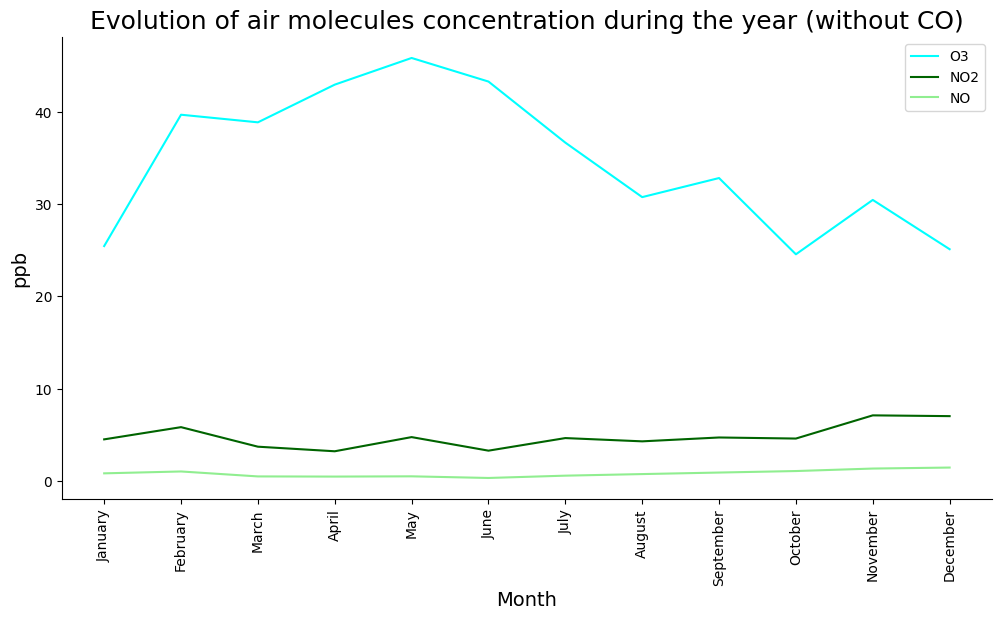

In [193]:
molecules = ["O3", "NO2", "NO"]
colors = ["cyan", "darkgreen", "lightgreen"]
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.figure(figsize=(12,6))
plt.title("Evolution of air molecules concentration during the year (without CO)", fontsize=18)
for i, c in enumerate(molecules):
    lines = sns.lineplot(x=months, y=df_month_molecules[c], color=colors[i], label=c)
    lines.legend(loc="best")
lines.spines["top"].set_visible(False)
lines.spines["right"].set_visible(False)
plt.ylabel("ppb", fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.xticks(rotation=90)
plt.show()

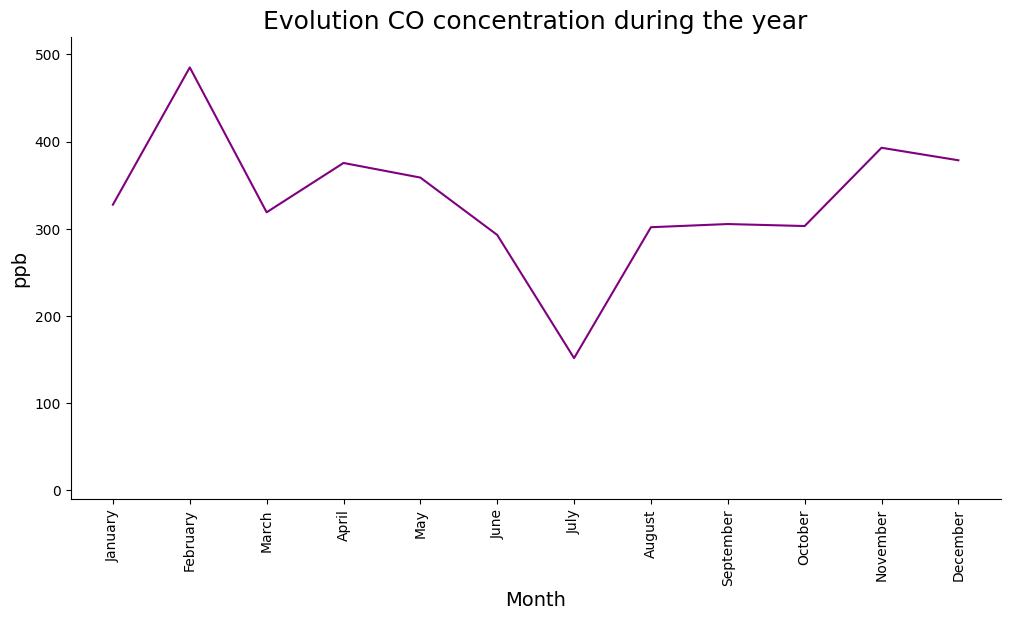

In [183]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.figure(figsize=(12,6))
plt.title("Evolution CO concentration during the year", fontsize=18)
lines = sns.lineplot(x=months, y=df_month_molecules["CO"], color='purple')
lines.spines["top"].set_visible(False)
lines.spines["right"].set_visible(False)
plt.ylim(-10, 520)
plt.ylabel("ppb", fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.xticks(rotation=90)
plt.show()

## Evolution of air particles during the year

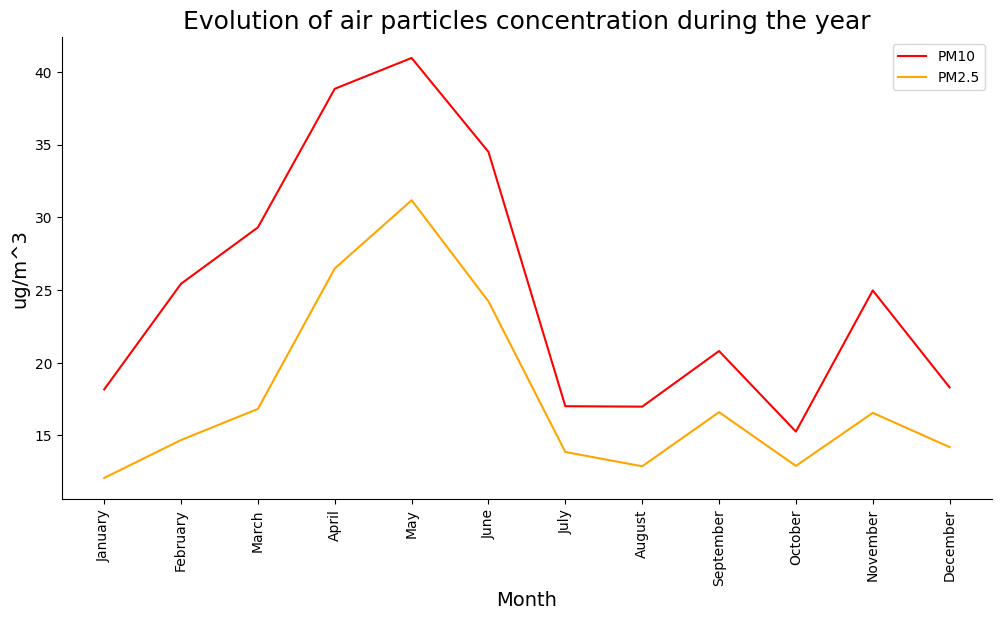

In [194]:
molecules = ["PM10", "PM2.5"]
colors = ["red", "orange"]
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.figure(figsize=(12,6))
plt.title("Evolution of air particles concentration during the year", fontsize=18)
for i, c in enumerate(molecules):
    lines = sns.lineplot(x=months, y=df_month_particles[c], color=colors[i], label=c)
    lines.legend(loc='best')
lines.spines["top"].set_visible(False)
lines.spines["right"].set_visible(False)
plt.ylabel("ug/m^3", fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.xticks(rotation=90)
plt.show()